In [1]:
!pip -q install yellowbrick

In [2]:
!pip -q install plotly --upgrade

In [3]:
!pip -q install imblearn

In [4]:
# Sistema
import sys

# Data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data visualization
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model and performance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Oversampling and under sampling
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [49]:
base = pd.read_csv('Star_dataset.csv', ',')
base

C:\Users\camil\AppData\Local\Temp\ipykernel_4028\3555816713.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  base = pd.read_csv('Star_dataset.csv', ',')


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [50]:
base.rename(columns={"Temperature (K)": "Temperature"}, inplace=True)
base.rename(columns={"Luminosity(L/Lo)": "Luminosity"}, inplace=True)
base.rename(columns={"Radius(R/Ro)": "Radius"}, inplace=True)
base.rename(columns={"Absolute magnitude(Mv)": "Absolute_magnitude"}, inplace=True)
base.rename(columns={"Star type": "Type"}, inplace=True)
base.rename(columns={"Star color": "Star_color"}, inplace=True)
base.rename(columns={"Spectral Class": "Spectral_Class"}, inplace=True)
base

,Temperature,Luminosity,Radius,Absolute_magnitude,Type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


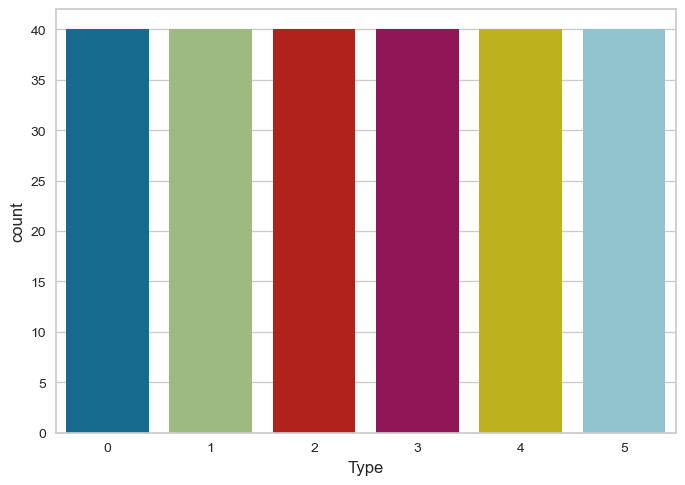

In [25]:
np.unique(base['Type'], return_counts=True), sns.countplot(x = base['Type']);

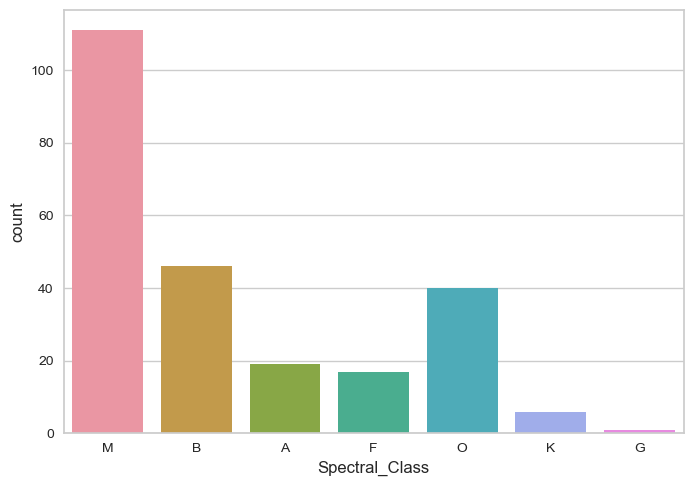

In [26]:
np.unique(base['Spectral_Class'], return_counts=True), sns.countplot(x = base['Spectral_Class']);

In [53]:
np.unique(base['Star_color'], return_counts=True)

(array(['Blue', 'Blue White', 'Orange', 'Orange-Red', 'Pale yellow orange',
        'Red', 'White', 'White-Yellow', 'Whitish', 'Yellowish',
        'Yellowish White'], dtype=object),
 array([ 56,  41,   2,   1,   1, 112,  10,   1,   2,   3,  11], dtype=int64))

In [52]:
base.replace('Blue ', 'Blue', inplace = True)
df.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)
base.replace('white', 'White', inplace = True)
base.replace('yellowish', 'Yellowish', inplace = True)
base.replace('yellow-white', 'Yellowish White', inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Red'),
  Text(1, 0, 'Blue White'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Yellowish White'),
  Text(4, 0, 'Pale yellow orange'),
  Text(5, 0, 'Blue'),
  Text(6, 0, 'Whitish'),
  Text(7, 0, 'Orange'),
  Text(8, 0, 'White-Yellow'),
  Text(9, 0, 'Yellowish'),
  Text(10, 0, 'Orange-Red')])

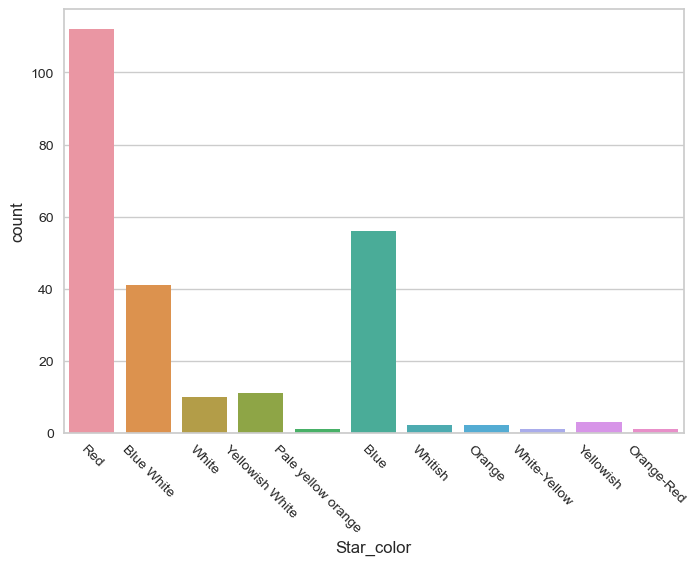

In [55]:
sns.countplot(x = base['Star_color']);
# Rotate x-labels
plt.xticks(rotation=-45)

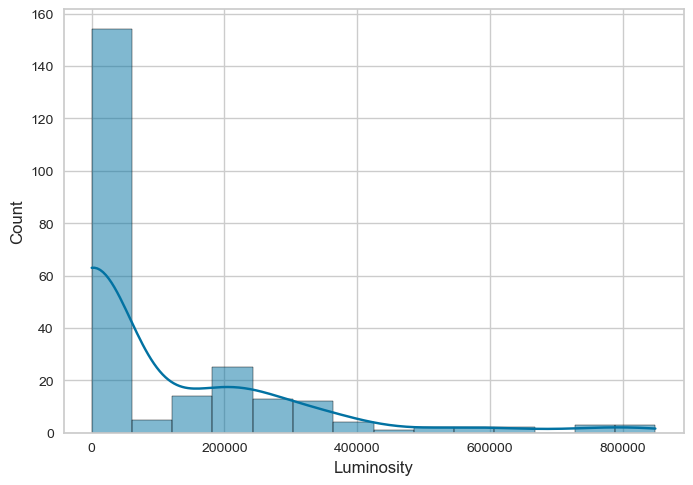

In [17]:
np.unique(base['Luminosity'], return_counts=True), sns.histplot(x = base['Luminosity'], kde=True);

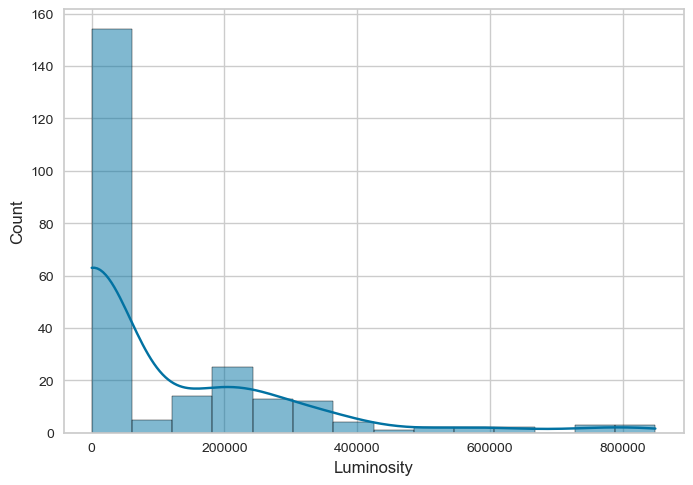

In [18]:
np.unique(base['Luminosity'], return_counts=True), sns.histplot(x = base['Luminosity'], kde=True);

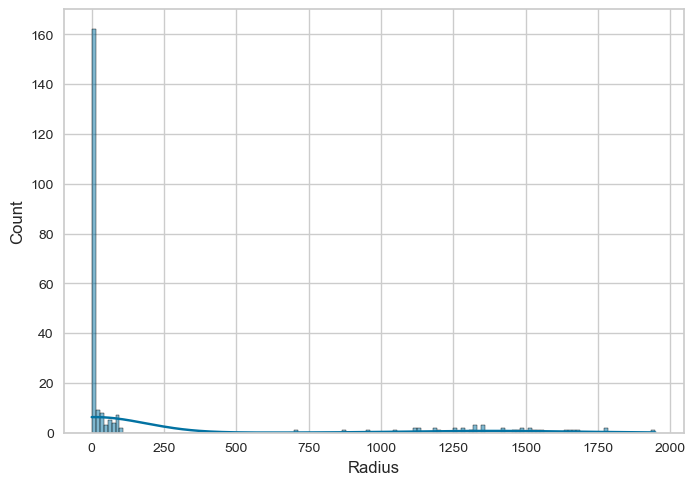

In [27]:
np.unique(base['Radius'], return_counts=True), sns.histplot(x = base['Radius'], kde=True);

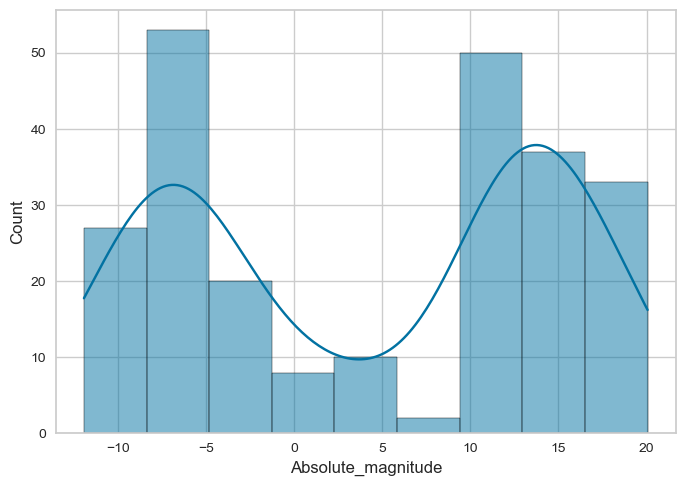

In [28]:
np.unique(base['Absolute_magnitude'], return_counts=True), sns.histplot(x = base['Absolute_magnitude'], kde=True);